In [1]:
import yfinance as yf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tickers = ["AMZN"]

In [4]:
data = yf.download(tickers,start = "2015-01-01")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...
2023-04-17,103.160004,103.730003,101.589996,102.739998,102.739998,39919500
2023-04-18,103.949997,104.199997,101.519997,102.300003,102.300003,39790500
2023-04-19,101.580002,105.120003,101.389999,104.300003,104.300003,58398900


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2090 entries, 2015-01-02 to 2023-04-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2090 non-null   float64
 1   High       2090 non-null   float64
 2   Low        2090 non-null   float64
 3   Close      2090 non-null   float64
 4   Adj Close  2090 non-null   float64
 5   Volume     2090 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 114.3 KB


# Calculating Stock Returns

# Daily returns

In [6]:
daily_returns = data['Adj Close'].pct_change()

In [7]:
total_returns = (1 + daily_returns).cumprod() - 1

In [8]:
print(total_returns)

Date
2015-01-02         NaN
2015-01-05   -0.020517
2015-01-06   -0.042882
2015-01-07   -0.032737
2015-01-08   -0.026125
                ...   
2023-04-17    5.660184
2023-04-18    5.631661
2023-04-19    5.761312
2023-04-20    5.729548
2023-04-21    5.933748
Name: Adj Close, Length: 2090, dtype: float64


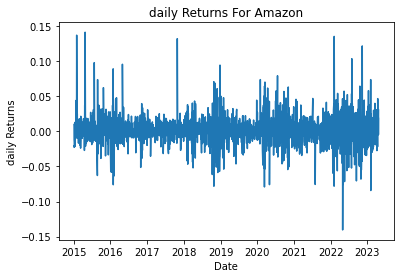

In [9]:
# Ploting
plt.plot(daily_returns)
plt.xlabel('Date')
plt.ylabel('daily Returns')
plt.title('daily Returns For Amazon')
plt.show()

# Annual returns per ever year

In [10]:
annual_data = data['Adj Close'].resample('Y').last()

In [11]:
annual_returns = annual_data.pct_change()

In [12]:
print(annual_returns)

Date
2015-12-31         NaN
2016-12-31    0.109456
2017-12-31    0.559564
2018-12-31    0.284317
2019-12-31    0.230277
2020-12-31    0.762561
2021-12-31    0.023768
2022-12-31   -0.496152
2023-12-31    0.273333
Freq: A-DEC, Name: Adj Close, dtype: float64


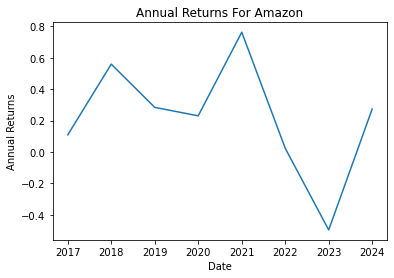

In [13]:
# Ploting
plt.plot(annual_returns)
plt.xlabel('Date')
plt.ylabel('Annual Returns')
plt.title('Annual Returns For Amazon')
plt.show()

# Weekly returns 

In [14]:
weekly_data = data['Adj Close'].resample('W').last()

In [15]:
weekly_returns = weekly_data.pct_change()

In [16]:
print(weekly_returns)

Date
2015-01-04         NaN
2015-01-11   -0.037566
2015-01-18   -0.020847
2015-01-25    0.074465
2015-02-01    0.134895
                ...   
2023-03-26   -0.008287
2023-04-02    0.052583
2023-04-09   -0.011908
2023-04-16    0.004409
2023-04-23    0.043410
Freq: W-SUN, Name: Adj Close, Length: 434, dtype: float64


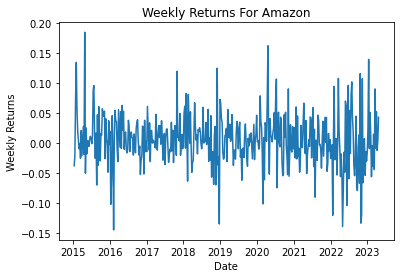

In [17]:
# Ploting
plt.plot(weekly_returns)
plt.xlabel('Date')
plt.ylabel('Weekly Returns')
plt.title('Weekly Returns For Amazon')
plt.show()


# Total Returns From Starting to Till Now

In [18]:
start_date = '2015-01-02'
end_date  = pd.Timestamp.today().strftime('%Y-%M-%d')

In [19]:
total_returns = (data['Adj Close'][-1] - data['Adj Close'][0]) / data['Adj Close'][0] * 100


In [20]:
print(f'Total returns for Amazon from {start_date} to {end_date}: {total_returns:.2f}%')


Total returns for Amazon from 2015-01-02 to 2023-13-24: 593.37%
